<a href="https://colab.research.google.com/github/NEHALSMITTAL/aadhaar-lifecycle-/blob/main/Aadhaar_Demographic_Change_Analysis_(India).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Statement**
The objective of this analysis is to study Aadhaar Demographic change patterns across Indian states and age groups using government‑released data.
The analysis aims to identify regional distribution, understand age‑wise enrolment trends, and highlight spatial differences in Aadhaar coverage to support data‑driven insights for governance and service planning.



In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset**
The dataset contains Aadhaar demographic update transactions released through government open data sources. It captures post‑enrolment demographic updates recorded across Indian states and union territories during 2025.

Each record represents a demographic update event, not a unique individual, and includes spatial, temporal, and age‑group information.

In [ ]:
files = glob.glob('/content/api_data_aadhar_demographic_*.csv')
df = pd.concat([pd.read_csv(f) for f in files], ignore_index = True)
df.shape

(2071700, 6)

In [ ]:
df.isna().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [ ]:
df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [ ]:
df.dtypes

,0
date,object
state,object
district,object
pincode,int64
demo_age_5_17,int64
demo_age_17_,int64


In [ ]:
df = df.rename(columns = {'demo_age_17_' : 'demo_age18_plus'})

In [ ]:
df.dtypes

,0
date,datetime64[ns]
state,object
district,object
pincode,int64
demo_age_5_17,int64
demo_age18_plus,int64


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

In [ ]:
df['date'].min(), df['date'].max()

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

In [ ]:
(df['demo_age_5_17'] < 0).sum()
(df['demo_age18_plus'] < 0).sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(473609)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['state'] = df['state'].str.strip().str.title()
df['state'].value_counts().tail(20)

,count
state,
Andaman & Nicobar Islands,384
Daman And Diu,319
Jammu & Kashmir,277
Dadra And Nagar Haveli,252
Daman & Diu,200
West Bangal,96
Westbengal,93
Dadra & Nagar Haveli,72
West Bengal,61


In [ ]:
state_corrections = {
    "Pondicherry": "Puducherry",
    "Andaman & Nicobar Islands": "Andaman And Nicobar Islands",
    "Daman & Diu": "Daman And Diu",
    "Dadra & Nagar Haveli": "Dadra And Nagar Haveli",
    "Westbengal": "West Bengal",
    "West Bangal": "West Bengal",
    "West Bengli": "West Bengal",
    "Uttaranchal": "Uttarakhand",
    "Chhatisgarh": "Chhattisgarh",
    "Jammu & Kashmir": "Jammu And Kashmir"
}

df['state'] = df['state'].replace(state_corrections)


In [ ]:
valid_states = df['state'].value_counts()
valid_states = valid_states[valid_states > 100].index

df = df[df['state'].isin(valid_states)]

In [ ]:
df['state'].value_counts().tail(20)

,count
state,
Uttarakhand,17713
Jammu And Kashmir,16015
Orissa,10731
Delhi,8066
Tripura,6968
Manipur,5744
Goa,4609
Meghalaya,4180
Puducherry,3810


In [ ]:
df['state'].value_counts().head(20)

,count
state,
Andhra Pradesh,154790
Tamil Nadu,153333
Uttar Pradesh,132366
Maharashtra,126303
West Bengal,124966
Karnataka,120416
Odisha,82491
Kerala,82186
Gujarat,75161


In [ ]:
final_state_corrections = {
    'Orissa': 'Odisha',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu'
}

df['state'] = df['state'].replace(final_state_corrections)


In [ ]:
df['state'].value_counts().sort_index()

,count
state,
Andaman And Nicobar Islands,1289
Andhra Pradesh,154790
Arunachal Pradesh,3608
Assam,47408
Bihar,74539
Chandigarh,1536
Chhattisgarh,27288
Dadra And Nagar Haveli And Daman And Diu,1250
Delhi,8066


## Data Cleaning & Validation

State and Union Territory names were standardized to resolve spelling variations, historical renaming (e.g., Orissa to Odisha),
and administrative reorganization (e.g., merger of Dadra & Nagar Haveli with Daman & Diu).
Invalid location entries were removed, and duplicate transactional records were dropped.
Post‑cleaning analysis was performed on validated administrative units only.


In [ ]:
df['district'].isna().sum()
df['district'].value_counts().tail(10)

,count
district,
Tiruvarur,1
Bandipur,1
Bally Jagachha,1
Balianta,1
Bhadrak(R),1
Chitrakoot *,1
Chandauli *,1
Bijapur(KAR),1
Medchalâmalkajgiri,1


In [ ]:
df['district'] = df['district'].str.strip()

The dataset contains free‑text location fields due to demographic update workflows, resulting in inconsistencies in state and district names.
Basic standardization was applied for major state name variations, while invalid administrative entries were excluded.
District‑level analysis is illustrative due to address‑level noise.
Duplicate transactional records were removed to avoid double counting.

# **Age-Wise Insights**

In [ ]:
df['total_updates'] = (df['demo_age_5_17'] + df['demo_age18_plus'])

In [ ]:
age_totals = df[['demo_age_5_17', 'demo_age18_plus']].sum()
age_totals

,0
demo_age_5_17,3597732
demo_age18_plus,32999727


In [ ]:
age_share = (age_totals / age_totals.sum()) * 100
age_share

,0
demo_age_5_17,9.830551
demo_age18_plus,90.169449


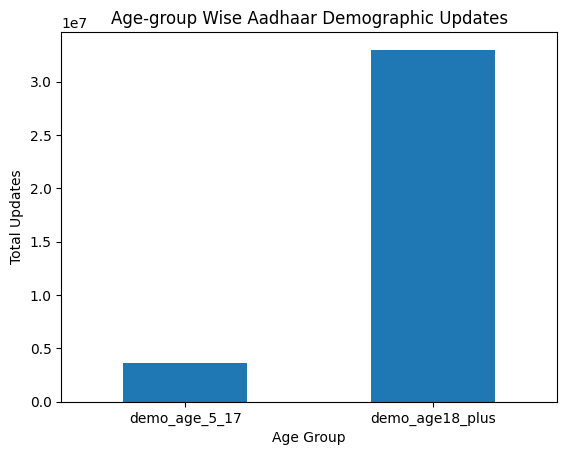

In [ ]:
age_totals.plot(
    kind='bar',
    title='Age‑group Wise Aadhaar Demographic Updates',
    ylabel='Total Updates',
    xlabel='Age Group'
)
plt.xticks(rotation=0)
plt.show()

# **Overall Age‑Group Demographic Updates**


* Adults (18+) account for more than 90% of Aadhaar demographic updates.
* The volume of updates in the 18+ group is nearly an order of magnitude higher than the 5–17 group.
* This indicates that Aadhaar demographic updates are primarily driven by adult‑life events, not childhood corrections.
* Updates among adults likely reflect address changes, migration, employment‑related updates, and marital status changes.
* While the 5–17 group still shows meaningful activity, Aadhaar updates are clearly dominated by post‑18 lifecycle needs.





# **State-Wise Insights**

In [ ]:
state_totals = (df.groupby('state')['total_updates'].sum().sort_values(ascending = False))
state_totals.head()

NameError: name 'df' is not defined

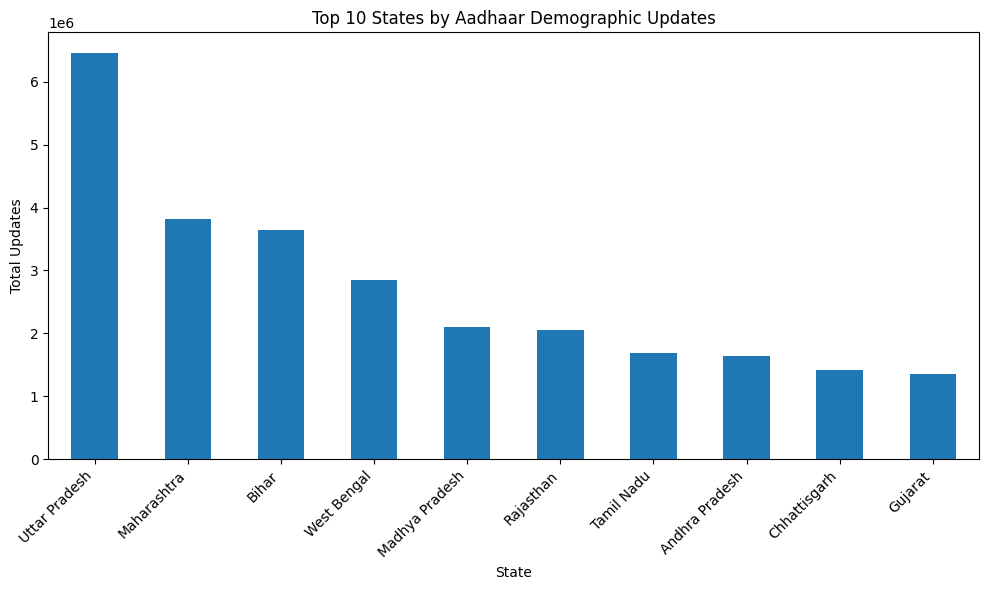

In [ ]:
top10_states = state_totals.head(10)

plt.figure(figsize=(10,6))
top10_states.plot(kind='bar')
plt.title('Top 10 States by Aadhaar Demographic Updates')
plt.ylabel('Total Updates')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Top States**
KEY INSIGHTS:


*   Demographic update activity is highly concentrated in a few large states.
*   Uttar Pradesh records the highest number of demographic updates, significantly ahead of other states.
* States with large populations such as Maharashtra, Bihar, and West Bengal consistently show high update volumes.
*   The concentration suggests that population size and scale of Aadhaar usage strongly influence demographic update counts.



In [ ]:
state_totals.tail(10)

,total_updates
state,
Mizoram,31556
Arunachal Pradesh,28391
Goa,27691
Nagaland,27555
Puducherry,24776
Sikkim,15213
Dadra And Nagar Haveli And Daman And Diu,9203
Andaman And Nicobar Islands,5228
Ladakh,4476


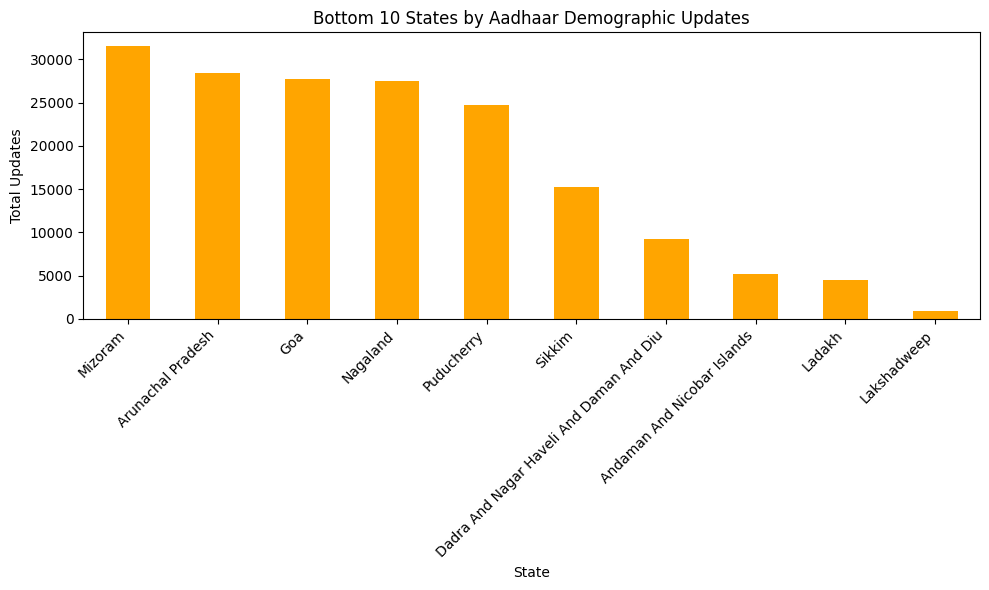

In [ ]:
bottom10_states = state_totals.tail(10)

plt.figure(figsize=(10,6))
bottom10_states.plot(kind='bar', color='orange')
plt.title('Bottom 10 States by Aadhaar Demographic Updates')
plt.ylabel('Total Updates')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Bottom-States**
KEY INSIGHTS:


*   Union Territories and smaller states consistently appear in the bottom tier of demographic updates.
*   Lower update counts in these regions are expected due to smaller populations, not due to data quality issues.
*   The sharp contrast between top states and smaller UTs highlights regional scale differences in Aadhaar demographic activity.



In [ ]:
monthly_updates = (df.groupby(df['date'].dt.to_period('M'))['total_updates'].sum().reset_index())
monthly_updates['month'] = monthly_updates['date'].dt.strftime('%b %Y')
monthly_updates


,date,total_updates,month
0,2025-03,8190152,Mar 2025
1,2025-04,907282,Apr 2025
2,2025-05,939768,May 2025
3,2025-06,1040944,Jun 2025
4,2025-07,1510892,Jul 2025
5,2025-09,5973225,Sep 2025
6,2025-10,3833141,Oct 2025
7,2025-11,7084284,Nov 2025
8,2025-12,7117771,Dec 2025


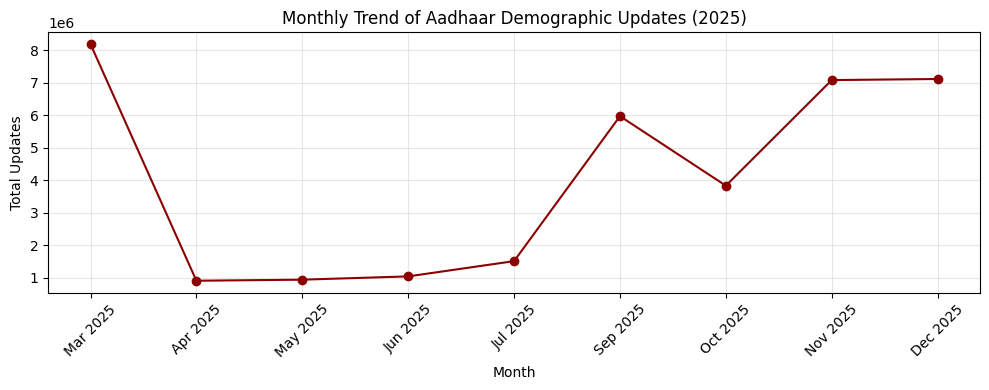

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    monthly_updates['month'],
    monthly_updates['total_updates'],
    marker='o',
    color='darkred')

plt.title('Monthly Trend of Aadhaar Demographic Updates (2025)')
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **Monthly Trend Insights**


*  Aadhaar demographic updates show clear month‑to‑month variation in 2025.
*   Update volumes are not evenly distributed across the year.
*   A sharp spike is observed during mid‑year, followed by a noticeable decline.
*   Update activity rises again toward the end of the year, indicating renewed administrative demand.
*  The pattern suggests time‑dependent administrative or lifecycle factors, rather than random updates.
*   No direct causal attribution (policy or elections) is made without external supporting data.



In [ ]:
monthly_updates['percentage_share'] = (
    monthly_updates['total_updates'] /
    monthly_updates['total_updates'].sum()) * 100

monthly_updates[['month', 'percentage_share']]

,month,percentage_share
0,Mar 2025,22.379018
1,Apr 2025,2.479085
2,May 2025,2.567850
3,Jun 2025,2.844307
4,Jul 2025,4.128407
5,Sep 2025,16.321420
6,Oct 2025,10.473790
7,Nov 2025,19.357311
8,Dec 2025,19.448812


# **Insights**
*   Monthly contribution to total updates is uneven
*   A few months account for a disproportionately large share
*   Confirms temporal concentration of update activity


### Temporal Smoothing Using Rolling Averages

A 3‑month rolling average was applied to monthly demographic update counts
to smooth short‑term volatility and highlight the underlying trend.
The rolling trend indicates sustained growth in update activity toward
the latter half of the year, confirming that observed peaks are not isolated anomalies.


In [ ]:
monthly_updates['rolling_3m_avg'] = (monthly_updates['total_updates'].rolling(window=3).mean())


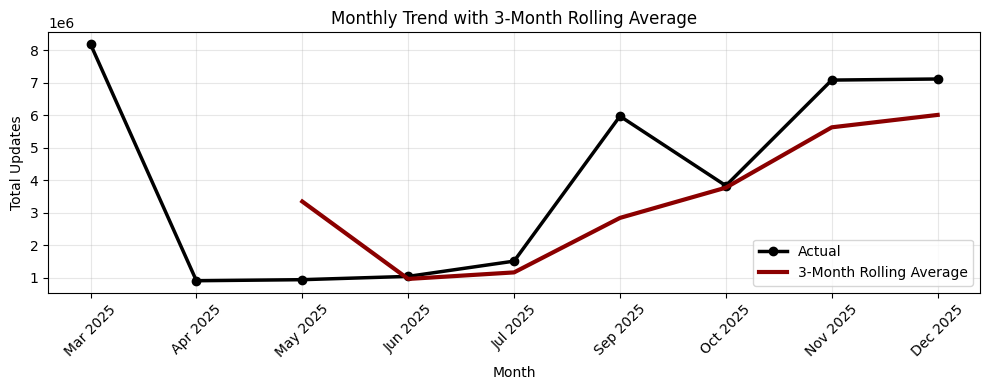

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(
    monthly_updates['month'],
    monthly_updates['total_updates'],
    label='Actual',
    color='black',
    linewidth=2.5,
    marker='o'
)

plt.plot(
    monthly_updates['month'],
    monthly_updates['rolling_3m_avg'],
    label='3‑Month Rolling Average',
    color='darkred',
    linewidth=3
)

plt.title('Monthly Trend with 3‑Month Rolling Average')
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Rolling** **3‑month** **average**
INSIGHTS:


*   The rolling average smooths short‑term fluctuations, revealing the underlying trend in demographic updates.
*   After an initial decline in early months, the rolling average shows a consistent upward movement.
*   The rising rolling trend toward the end of the year indicates sustained growth in update activity, not isolated spikes.
*   Smoothing confirms that mid‑year volatility does not alter the overall increasing trajectory.
*   Rolling averages help distinguish structural demand from month‑specific noise.



# **State Monthly Trend(UP)**

In [ ]:
up_df = df[df['state'] == 'Uttar Pradesh']
up_monthly = (up_df.groupby(up_df['date'].dt.to_period('M'))['total_updates'].sum().reset_index())
up_monthly['month'] = up_monthly['date'].dt.strftime('%b %Y')


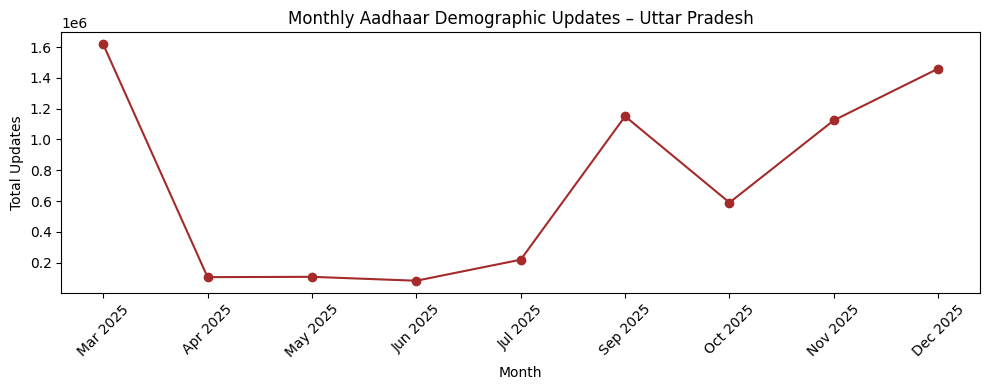

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    up_monthly['month'],
    up_monthly['total_updates'],
    marker='o',
    color='brown'
)
plt.title('Monthly Aadhaar Demographic Updates – Uttar Pradesh')
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Monthly Trend Insights (Uttar Pradesh)**



* Aadhaar demographic updates in Uttar Pradesh show significant month‑to‑month variability, indicating uneven temporal demand.

* A high volume of updates in March is followed by a sharp decline during April–June.

* Update activity increases steadily from July, reaching a clear peak around September.

* A temporary dip in October is observed, followed by consistent growth in November and December.

* Overall, the pattern confirms that demographic update demand within a large state is not constant and varies substantially across the year.
* This intra‑state variation reinforces the national‑level finding that Aadhaar demographic updates are time‑dependent rather than uniformly distributed.




# **Conclusion**

*   This analysis examined Aadhaar demographic updates across states, age groups, and time using large‑scale government data.
*   Adults (18+) account for the majority of demographic updates, indicating that Aadhaar updates are primarily driven by post‑enrolment lifecycle needs.
*   A small number of populous states dominate overall update volumes, while smaller states and union territories show lower counts due to population scale.
*   Monthly trends reveal non‑uniform update activity, highlighting periods of increased administrative demand.
*   Overall, Aadhaar demographic updates represent a continuous and dynamic lifecycle process, rather than a one‑time administrative action.




# **Limitations**



*   The dataset contains transaction‑level records, where multiple updates by the same individual may occur.
*   Location fields are partially free‑text, leading to residual inconsistencies despite standardization.
*   The analysis does not link update trends to specific policies or events due to lack of external reference data.
*   Population normalization was not applied; results reflect absolute update volumes.





# **Future** **Work**



*   Normalize demographic updates by state population for per‑capita comparison.
*   Combine enrolment and demographic datasets to study the full Aadhaar lifecycle.
*   Incorporate district‑level trends for selected high‑volume states.
*   Extend temporal analysis across multiple years to identify long‑term patterns.
*   Integrate external administrative or policy timelines for causal analysis.

